<a href="https://colab.research.google.com/github/rahulvudari/GN22CDBDS001/blob/main/SearchTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [4]:
data = pd.read_excel('/tmp/LifeUniverseAndEverything (1).xlsx')

In [5]:
data

,Life,O2,O3,H2O,N2,H2,Sunlight,Aliens,Plants
0,5,6,38,48,25,38,0,1,1
1,4,0,4,2,6,13,0,1,0
2,4,11,3,78,30,15,0,0,1
3,0,22,30,68,28,23,0,1,0
4,10,20,23,56,20,27,1,0,1
...,...,...,...,...,...,...,...,...,...
195,10,24,0,90,24,26,0,1,1
196,10,21,6,75,34,4,0,0,0
197,0,13,8,42,18,2,0,0,1
198,0,4,38,2,21,4,1,0,1


In [18]:
X = data[['O2','O3','H2O','N2','H2','Sunlight','Aliens','Plants']]
Y = data[['Life']]
numeric_var = ['O2','O3','H2O','N2','H2','Sunlight','Aliens','Plants']

In [9]:
X.head()

,O2,O3,H2O,N2,H2,Sunlight,Aliens,Plants
0,6,38,48,25,38,0,1,1
1,0,4,2,6,13,0,1,0
2,11,3,78,30,15,0,0,1
3,22,30,68,28,23,0,1,0
4,20,23,56,20,27,1,0,1


In [10]:
Y.head()

,Life
0,5
1,4
2,4
3,0
4,10


In [19]:
from os import X_OK
from sklearn.pipeline import Pipeline #sklearn==0.23.2
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from lightgbm import LGBMClassifier

tuples = list()

tuples.append((Pipeline([
        ('scaler', StandardScaler()),
    ]), numeric_var))

preprocess = make_column_transformer(*tuples)

pipe = Pipeline([
    ('preprocess', preprocess),
    ('classifier', LGBMClassifier())
])

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
param_grid = {
    "classifier__learning_rate": [0.0001, 0.0005, 0.001, 0.01, 0.1],
    "classifier__n_estimators": [100, 300, 600, 800, 1000],
    "classifier__max_depth": [ 4, 20, 100, 250, 400] 
}

# grid
reg_grid = GridSearchCV(pipe,
                        param_grid=param_grid,
                        cv=5,
                        n_jobs=8, 
                        scoring='roc_auc'
                       )

model_grid = reg_grid.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_lab

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, randint

n_iter = 70

param_grid = {
    "classifier__learning_rate": loguniform(1e-4, 0.1),
    "classifier__n_estimators": randint(100,1000),
    "classifier__max_depth": randint(4, 400) 
}

# Random
reg_rand = RandomizedSearchCV(pipe,
                         param_distributions=param_grid,
                         n_iter=n_iter,
                         cv=5,
                         n_jobs=8,
                         scoring='roc_auc',
                         random_state=123)

model_rand = reg_rand.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
!pip install scikit_optimize

     |████████████████████████████████| 100 kB 6.6 MB/s 


In [31]:
from skopt import BayesSearchCV

# Bayesian
n_iter = 70

param_grid = {
    "classifier__learning_rate": (0.0001, 0.1, "log-uniform"),
    "classifier__n_estimators": (100,  1000) ,
    "classifier__max_depth": (4, 400) 
}

reg_bay = BayesSearchCV(estimator=pipe,
                    search_spaces=param_grid,
                    n_iter=n_iter,
                    cv=5,
                    n_jobs=8,
                    random_state=123)

model_bay = reg_bay.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


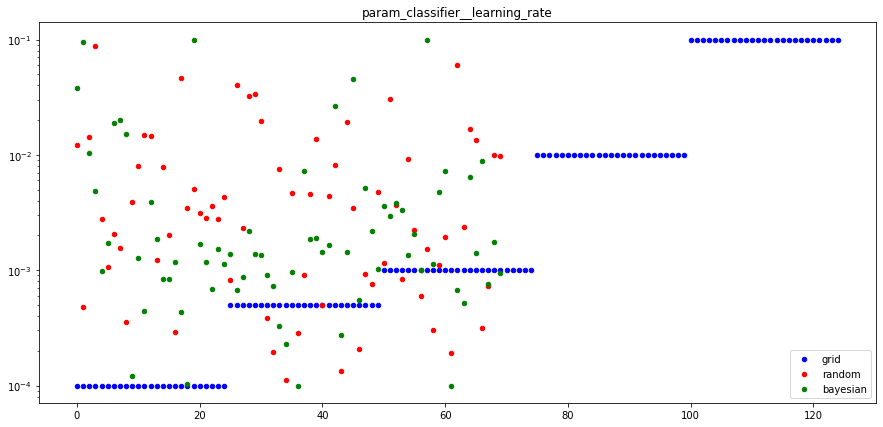

In [34]:
import matplotlib.pyplot as plt

param = 'param_classifier__learning_rate'

grid = model_grid.cv_results_[param]
rand = model_rand.cv_results_[param]
bay = model_bay.cv_results_[param]

fig = plt.figure(figsize=(15, 7))

ax = plt.gca()
ax.scatter(np.arange(len(grid)), grid.data, c='b', s=20, label='grid');
ax.scatter(np.arange(len(rand)), rand.data, c='r', s=20, label='random');
ax.scatter(np.arange(len(bay)), bay, c='g', s=20, label='bayesian');
ax.set_yscale('log')

plt.legend();
plt.title(param);